# Credit Card Fraud Detection
### Recognize fraudulent credit card transactions
### 2. Baseline Model
             KwangMyung Yu, Senior Researcher, Korea Electric Power Corporation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import warnings; warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

# Options for pandas
pd.options.display.max_columns = 30 #중요

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import recall_score,precision_score, accuracy_score
from sklearn.metrics import classification_report

In [3]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [4]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [5]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0, fontsize = 16)
    plt.yticks(tick_marks, classes, fontsize = 16)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", 
                 fontsize = 18)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### 2.1 Xgboost

In [6]:
XGB = XGBClassifier()

In [7]:
XGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [8]:
y_pred = XGB.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Test Result(Base_XGB)')
print('accuracy : ', acc)
print('precsion :', precision)
print('recall : ', recall)

Test Result(Base_XGB)
accuracy :  0.9994967405170698
precsion : 0.9411764705882353
recall :  0.7567567567567568


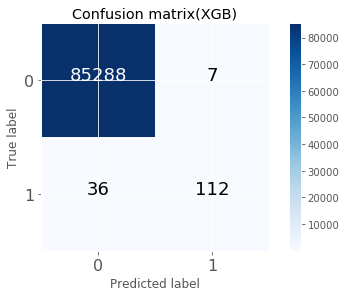

In [9]:
class_names = [0,1]
plot_confusion_matrix(conf_mat , classes=class_names,
                      title='Confusion matrix(XGB)')
plt.show()

#### 2.2 LGBM

In [10]:
LGBM = LGBMClassifier()
LGBM.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [11]:
y_pred = LGBM.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Test Result(Base_LGBM)')
print('accuracy : ', acc)
print('precsion :', precision)
print('recall : ', recall)

Test Result(Base_LGBM)
accuracy :  0.9896890324543848
precsion : 0.029525032092426188
recall :  0.1554054054054054


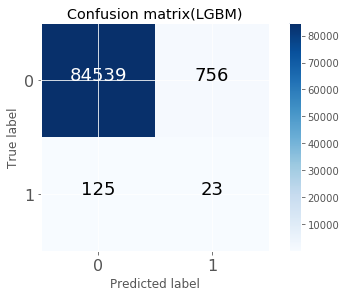

In [12]:
class_names = [0,1]
plot_confusion_matrix(conf_mat , classes=class_names,
                      title='Confusion matrix(LGBM)')
plt.show()

#### 2.3 CatBoost

In [13]:
Cat = CatBoostClassifier()
Cat.fit(X_train, y_train)

Learning rate set to 0.098829
0:	learn: 0.3783368	total: 80.4ms	remaining: 1m 20s
1:	learn: 0.2033165	total: 102ms	remaining: 50.7s
2:	learn: 0.1104211	total: 120ms	remaining: 40s
3:	learn: 0.0634786	total: 140ms	remaining: 35s
4:	learn: 0.0383025	total: 162ms	remaining: 32.2s
5:	learn: 0.0242738	total: 181ms	remaining: 30s
6:	learn: 0.0164464	total: 201ms	remaining: 28.5s
7:	learn: 0.0117563	total: 218ms	remaining: 27.1s
8:	learn: 0.0089747	total: 235ms	remaining: 25.9s
9:	learn: 0.0071587	total: 252ms	remaining: 25s
10:	learn: 0.0059339	total: 269ms	remaining: 24.2s
11:	learn: 0.0049747	total: 287ms	remaining: 23.6s
12:	learn: 0.0043783	total: 306ms	remaining: 23.2s
13:	learn: 0.0039318	total: 323ms	remaining: 22.8s
14:	learn: 0.0036253	total: 343ms	remaining: 22.5s
15:	learn: 0.0034012	total: 363ms	remaining: 22.3s
16:	learn: 0.0032355	total: 387ms	remaining: 22.4s
17:	learn: 0.0030804	total: 404ms	remaining: 22.1s
18:	learn: 0.0029630	total: 421ms	remaining: 21.7s
19:	learn: 0.0028

166:	learn: 0.0011692	total: 3.18s	remaining: 15.9s
167:	learn: 0.0011665	total: 3.2s	remaining: 15.9s
168:	learn: 0.0011600	total: 3.22s	remaining: 15.8s
169:	learn: 0.0011539	total: 3.24s	remaining: 15.8s
170:	learn: 0.0011507	total: 3.25s	remaining: 15.8s
171:	learn: 0.0011467	total: 3.27s	remaining: 15.7s
172:	learn: 0.0011419	total: 3.29s	remaining: 15.7s
173:	learn: 0.0011352	total: 3.3s	remaining: 15.7s
174:	learn: 0.0011294	total: 3.32s	remaining: 15.7s
175:	learn: 0.0011254	total: 3.34s	remaining: 15.6s
176:	learn: 0.0011200	total: 3.36s	remaining: 15.6s
177:	learn: 0.0011158	total: 3.38s	remaining: 15.6s
178:	learn: 0.0011094	total: 3.4s	remaining: 15.6s
179:	learn: 0.0011069	total: 3.41s	remaining: 15.6s
180:	learn: 0.0011057	total: 3.43s	remaining: 15.5s
181:	learn: 0.0010995	total: 3.45s	remaining: 15.5s
182:	learn: 0.0010980	total: 3.46s	remaining: 15.5s
183:	learn: 0.0010969	total: 3.48s	remaining: 15.5s
184:	learn: 0.0010954	total: 3.5s	remaining: 15.4s
185:	learn: 0.00

331:	learn: 0.0007304	total: 6.59s	remaining: 13.3s
332:	learn: 0.0007287	total: 6.61s	remaining: 13.2s
333:	learn: 0.0007260	total: 6.62s	remaining: 13.2s
334:	learn: 0.0007257	total: 6.64s	remaining: 13.2s
335:	learn: 0.0007223	total: 6.66s	remaining: 13.2s
336:	learn: 0.0007204	total: 6.67s	remaining: 13.1s
337:	learn: 0.0007196	total: 6.69s	remaining: 13.1s
338:	learn: 0.0007145	total: 6.71s	remaining: 13.1s
339:	learn: 0.0007131	total: 6.73s	remaining: 13.1s
340:	learn: 0.0007085	total: 6.74s	remaining: 13s
341:	learn: 0.0007081	total: 6.76s	remaining: 13s
342:	learn: 0.0007064	total: 6.78s	remaining: 13s
343:	learn: 0.0007056	total: 6.8s	remaining: 13s
344:	learn: 0.0007017	total: 6.82s	remaining: 12.9s
345:	learn: 0.0006929	total: 6.83s	remaining: 12.9s
346:	learn: 0.0006909	total: 6.85s	remaining: 12.9s
347:	learn: 0.0006906	total: 6.87s	remaining: 12.9s
348:	learn: 0.0006889	total: 6.89s	remaining: 12.8s
349:	learn: 0.0006868	total: 6.9s	remaining: 12.8s
350:	learn: 0.0006808	

491:	learn: 0.0004262	total: 9.74s	remaining: 10.1s
492:	learn: 0.0004244	total: 9.76s	remaining: 10s
493:	learn: 0.0004238	total: 9.78s	remaining: 10s
494:	learn: 0.0004179	total: 9.8s	remaining: 9.99s
495:	learn: 0.0004172	total: 9.81s	remaining: 9.97s
496:	learn: 0.0004156	total: 9.83s	remaining: 9.95s
497:	learn: 0.0004155	total: 9.85s	remaining: 9.93s
498:	learn: 0.0004142	total: 9.87s	remaining: 9.91s
499:	learn: 0.0004135	total: 9.89s	remaining: 9.89s
500:	learn: 0.0004124	total: 9.92s	remaining: 9.88s
501:	learn: 0.0004104	total: 9.94s	remaining: 9.86s
502:	learn: 0.0004076	total: 9.96s	remaining: 9.84s
503:	learn: 0.0004067	total: 9.97s	remaining: 9.81s
504:	learn: 0.0004065	total: 9.99s	remaining: 9.79s
505:	learn: 0.0004052	total: 10s	remaining: 9.78s
506:	learn: 0.0004051	total: 10s	remaining: 9.75s
507:	learn: 0.0003997	total: 10.1s	remaining: 9.74s
508:	learn: 0.0003994	total: 10.1s	remaining: 9.71s
509:	learn: 0.0003981	total: 10.1s	remaining: 9.69s
510:	learn: 0.0003967

654:	learn: 0.0002435	total: 12.7s	remaining: 6.71s
655:	learn: 0.0002429	total: 12.8s	remaining: 6.69s
656:	learn: 0.0002423	total: 12.8s	remaining: 6.67s
657:	learn: 0.0002417	total: 12.8s	remaining: 6.65s
658:	learn: 0.0002415	total: 12.8s	remaining: 6.63s
659:	learn: 0.0002408	total: 12.8s	remaining: 6.61s
660:	learn: 0.0002394	total: 12.8s	remaining: 6.59s
661:	learn: 0.0002387	total: 12.9s	remaining: 6.57s
662:	learn: 0.0002383	total: 12.9s	remaining: 6.55s
663:	learn: 0.0002377	total: 12.9s	remaining: 6.53s
664:	learn: 0.0002374	total: 12.9s	remaining: 6.51s
665:	learn: 0.0002369	total: 12.9s	remaining: 6.49s
666:	learn: 0.0002364	total: 13s	remaining: 6.47s
667:	learn: 0.0002360	total: 13s	remaining: 6.45s
668:	learn: 0.0002348	total: 13s	remaining: 6.43s
669:	learn: 0.0002334	total: 13s	remaining: 6.41s
670:	learn: 0.0002325	total: 13s	remaining: 6.39s
671:	learn: 0.0002322	total: 13.1s	remaining: 6.37s
672:	learn: 0.0002320	total: 13.1s	remaining: 6.35s
673:	learn: 0.0002304	

813:	learn: 0.0001504	total: 16s	remaining: 3.65s
814:	learn: 0.0001503	total: 16s	remaining: 3.63s
815:	learn: 0.0001499	total: 16s	remaining: 3.61s
816:	learn: 0.0001497	total: 16s	remaining: 3.59s
817:	learn: 0.0001492	total: 16s	remaining: 3.57s
818:	learn: 0.0001491	total: 16.1s	remaining: 3.55s
819:	learn: 0.0001488	total: 16.1s	remaining: 3.53s
820:	learn: 0.0001485	total: 16.1s	remaining: 3.51s
821:	learn: 0.0001482	total: 16.1s	remaining: 3.49s
822:	learn: 0.0001481	total: 16.1s	remaining: 3.47s
823:	learn: 0.0001480	total: 16.1s	remaining: 3.45s
824:	learn: 0.0001471	total: 16.2s	remaining: 3.43s
825:	learn: 0.0001470	total: 16.2s	remaining: 3.41s
826:	learn: 0.0001463	total: 16.2s	remaining: 3.39s
827:	learn: 0.0001461	total: 16.2s	remaining: 3.37s
828:	learn: 0.0001458	total: 16.2s	remaining: 3.35s
829:	learn: 0.0001456	total: 16.3s	remaining: 3.33s
830:	learn: 0.0001454	total: 16.3s	remaining: 3.31s
831:	learn: 0.0001444	total: 16.3s	remaining: 3.29s
832:	learn: 0.0001438	

979:	learn: 0.0001047	total: 19s	remaining: 388ms
980:	learn: 0.0001046	total: 19s	remaining: 368ms
981:	learn: 0.0001043	total: 19s	remaining: 349ms
982:	learn: 0.0001043	total: 19s	remaining: 329ms
983:	learn: 0.0001040	total: 19.1s	remaining: 310ms
984:	learn: 0.0001038	total: 19.1s	remaining: 291ms
985:	learn: 0.0001038	total: 19.1s	remaining: 271ms
986:	learn: 0.0001034	total: 19.1s	remaining: 252ms
987:	learn: 0.0001032	total: 19.1s	remaining: 232ms
988:	learn: 0.0001032	total: 19.2s	remaining: 213ms
989:	learn: 0.0001027	total: 19.2s	remaining: 194ms
990:	learn: 0.0001026	total: 19.2s	remaining: 175ms
991:	learn: 0.0001024	total: 19.2s	remaining: 155ms
992:	learn: 0.0001022	total: 19.3s	remaining: 136ms
993:	learn: 0.0001020	total: 19.3s	remaining: 116ms
994:	learn: 0.0001020	total: 19.3s	remaining: 97.1ms
995:	learn: 0.0001016	total: 19.3s	remaining: 77.7ms
996:	learn: 0.0001011	total: 19.4s	remaining: 58.3ms
997:	learn: 0.0001010	total: 19.4s	remaining: 38.9ms
998:	learn: 0.00

In [14]:
y_pred = Cat.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Test Result(Base_Cat)')
print('accuracy : ', acc)
print('precsion :', precision)
print('recall : ', recall)

Test Result(Base_Cat)
accuracy :  0.9995084442259752
precsion : 0.9568965517241379
recall :  0.75


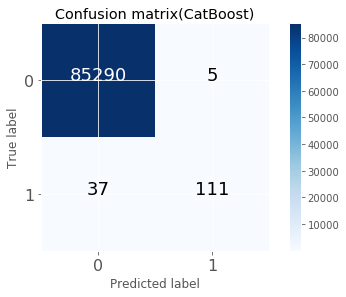

In [15]:
class_names = [0,1]
plot_confusion_matrix(conf_mat , classes=class_names,
                      title='Confusion matrix(CatBoost)')
plt.show()